# Trying our code

In [115]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
# Not sure if we need to define p2 somewhere
# # Numeraire
# p2 = 1

In [118]:
from petratrying import ExchangeEconomyClass

# Question 1

In [119]:
model = ExchangeEconomyClass()

In [120]:
# code for solving the model (remember documentation and comments)

#NOT SURE ABOUT WHAT THIS IS!

# a = np.array([1,2,3])
# b = inauguralproject.square(a)
# print(b)

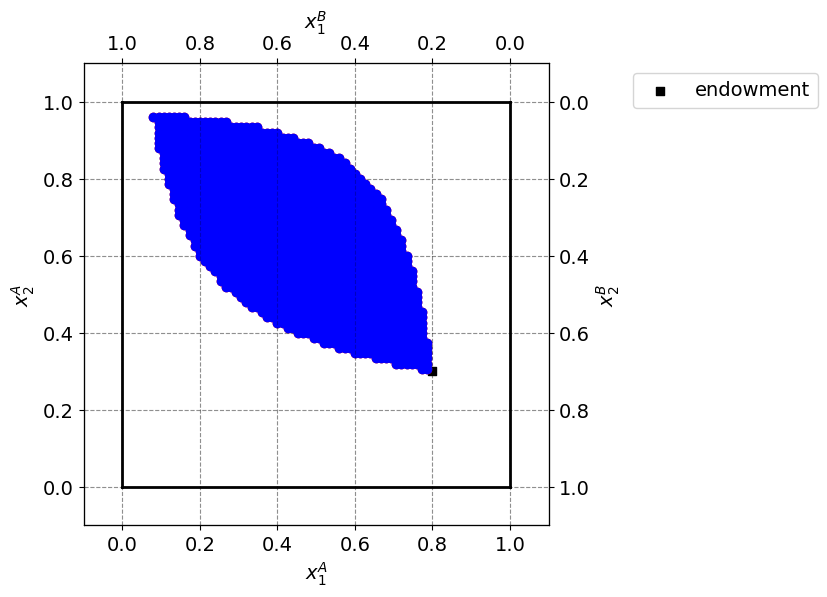

In [121]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Define initial endowments
omegaA1 = par.w1A
omegaA2 = par.w2A
omegaB1 = 1 - par.w1A
omegaB2 = 1 - par.w2A

# Generate grid of points
N = 75
xA1_values = np.linspace(0, 1, N+1)
xA2_values = np.linspace(0, 1, N+1)

# Initialize lists to store valid points
valid_points_A = []
valid_points_B = []

# Check each point
for xA1 in xA1_values:
    for xA2 in xA2_values:
        # Calculate corresponding B goods
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        # Check if point satisfies conditions
        if model.utility_A(xA1, xA2) >= model.utility_A(omegaA1, omegaA2) and model.utility_B(xB1, xB2) >= model.utility_B(omegaB1, omegaB2):
            valid_points_A.append((xA1, xA2))
            valid_points_B.append((xB1, xB2))

# Plot valid points
ax_A.scatter([point[0] for point in valid_points_A], [point[1] for point in valid_points_A], marker='o', color='red', label='Valid points A')
#NOT SURE WHAT THIS ax_A purpose is
ax_B.scatter([point[0] for point in valid_points_B], [point[1] for point in valid_points_B], marker='o', color='blue', label='Valid points B')


# Question 2

Calculate the error in the market

In [146]:
# Define the price set P1
N = 10
P1 = np.array([0.5+2*i/N for i in range (N+1)])

#NOAH P1:
#P1 = np.linspace(0.5, 2.5, N+1)  # Using linspace for correct increments

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price level in P1
for p1 in P1:
    # Calculate p2 based on numeraire condition
    p2 = 1.0
    
    # Calculate demanded quantities for both consumers
    xA1, xA2 = model.demand_A(p1, p2)
    xB1, xB2 = model.demand_B(p1, p2)
    
    # Calculate market clearing errors
    epsilon1 = xA1 + xB1 - 1
    epsilon2 = xA2 + xB2 - 1 

    
    # Append errors to lists
    errors_1.append(epsilon1)
    errors_2.append(epsilon2)

# Print errors for each price level
for i, p1 in enumerate(P1):
    print(f"Price level p1 = {p1}: Error 1 = {errors_1[i]}, Error 2 = {errors_2[i]}")


Price level p1 = 0.5: Error 1 = 0.3999999999999999, Error 2 = -0.30000000000000004
Price level p1 = 0.7: Error 1 = 0.22857142857142865, Error 2 = -0.1399999999999999
Price level p1 = 0.9: Error 1 = 0.13333333333333308, Error 2 = 0.020000000000000018
Price level p1 = 1.1: Error 1 = 0.07272727272727275, Error 2 = 0.18000000000000016
Price level p1 = 1.3: Error 1 = 0.03076923076923066, Error 2 = 0.3400000000000003
Price level p1 = 1.5: Error 1 = 0.0, Error 2 = 0.5000000000000004
Price level p1 = 1.7: Error 1 = -0.0235294117647058, Error 2 = 0.6600000000000004
Price level p1 = 1.9: Error 1 = -0.042105263157894646, Error 2 = 0.8200000000000003
Price level p1 = 2.1: Error 1 = -0.05714285714285716, Error 2 = 0.9800000000000004
Price level p1 = 2.3: Error 1 = -0.06956521739130439, Error 2 = 1.1399999999999997
Price level p1 = 2.5: Error 1 = -0.08000000000000007, Error 2 = 1.3000000000000003


# Question 3

What is market clearing price?

To get market clearing price we need to have both error terms == 0
Walras law: if one market clears also the other will
Use iterative method to get the error very close to zero
Look at notebook on random numbers example

In [144]:
#ISSUE: WHATEVER VALUE I ASSIGN TO P1_GUESS IT DOES NOT ADJUST BUT ONLY SAY THAT IT IS RIGHT

p2 = 1.0
p1_guess = 0.95
N = 1000 # number of agents --> Not sure why 1000, I just copied the notebook
k = 2 # relative endowment of good 1 --> Also copied the notebook, not sure what to put here
kappa = 0.1 # Adjustment factor for solving
eps = 1e-8 # Tolerance parameter for solving
maxiter=500 # Maximum iterations when solving
#p2 = 1
model.find_equilibrium(p1_guess, p2, N, k, eps, kappa, maxiter)

  0: p1 =   0.95000000 -> excess demand ->     0.11578947
  1: p1 =   0.95001158 -> excess demand ->     0.11578562
  2: p1 =   0.95002316 -> excess demand ->     0.11578178
  3: p1 =   0.95003474 -> excess demand ->     0.11577793
  4: p1 =   0.95004631 -> excess demand ->     0.11577408
   ...
 25: p1 =   0.95028936 -> excess demand ->     0.11569332
 50: p1 =   0.95057848 -> excess demand ->     0.11559730
 75: p1 =   0.95086735 -> excess demand ->     0.11550142
100: p1 =   0.95115599 -> excess demand ->     0.11540568
125: p1 =   0.95144439 -> excess demand ->     0.11531007
150: p1 =   0.95173255 -> excess demand ->     0.11521460
175: p1 =   0.95202048 -> excess demand ->     0.11511927
200: p1 =   0.95230816 -> excess demand ->     0.11502408
225: p1 =   0.95259561 -> excess demand ->     0.11492902
250: p1 =   0.95288281 -> excess demand ->     0.11483410
275: p1 =   0.95316979 -> excess demand ->     0.11473931
300: p1 =   0.95345652 -> excess demand ->     0.11464466
325: p1

In [124]:
model.print_solution()

AttributeError: 'ExchangeEconomyClass' object has no attribute 'p1_star'

In [ ]:
print(model.Z1,model.Z2)
assert np.abs(model.Z1) < eps
assert np.abs(model.Z2) < eps

# Question 4a

Assume that A chooses the price to maximize her own utility <br>
4A: Find the allocation if only prices in P1 can be chosen

In [131]:
#LOOK AT THE CONSUMER PROBLEM NOTEBOOK

In [132]:
from types import SimpleNamespace 
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [171]:
#FIRST METHOD: 

In [156]:
obj = lambda x: - model.utility_A(p1, p2) # here the input is a scalar
res = optimize.minimize_scalar(obj,bracket=(0,10),method='brent')
x = res.x
f = -res.fun

print(f'best is {f:.8f} at x = {x:.8f}')

best is 1.35720881 at x = 0.00000000


In [169]:
# Define the utility function as a lambda function of p1
obj = lambda x: -model.utility_A(p1, p2)

# Find the maximum of the utility function with respect to p1
res = optimize.minimize_scalar(obj, bracket=(0, 10), method='brent')

# Extract the optimal value of p1 and the corresponding utility value
p1_optimal = res.x
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at p1 = {p1_optimal:.8f}')

Optimal utility is 1.35720881 at p1 = 0.00000000


In [178]:
# Define the utility function as a lambda function of p1
p2_fixed = 1.0
obj = lambda x: -model.utility_A(1 - model.demand_B(p1, p2_fixed)[0], 1 - model.demand_B(p1, p2_fixed)[1])

# Find the maximum of the utility function with respect to p1
res = optimize.minimize_scalar(obj, bracket=(0, 10), method='brent')

# Extract the optimal value of p1 and the corresponding utility value
p1_optimal = res.x
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at p1 = {p1_optimal:.8f}')

Optimal utility is nan at p1 = nan


/Users/petra/Desktop/KU/Introduction to Programming/Intro to Prog /projects-2024-petra-maritza-noah/inauguralproject/petratrying.py:20: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha * x2A**(1 - par.alpha)


In [175]:
from scipy.optimize import minimize

# Define the objective function to maximize utility for agent A
def objective_function(p1):
    p2_fixed = 1.0  # Fix p2 at 1.0
    return -model.utility_A(1 - model.demand_B(p1, p2_fixed)[0], 1 - model.demand_B(p1, p2_fixed)[1])

# Initial guess for p1
initial_p1 = 0.5  # Starting from a balanced price for p1

# Set bounds for p1 (should be positive)
bounds = [(0.01, None)]

# Find the maximum of the utility function with respect to p1
res = minimize(objective_function, initial_p1, bounds=bounds)

# Extract the optimal value of p1 and the corresponding utility value
p1_optimal = res.x[0]
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at p1 = {p1_optimal:.8f} with p2 fixed at 1.0')

Optimal utility is 0.47495713 at p1 = 0.96429642 with p2 fixed at 1.0


In [172]:
#SECOND METHOD:

In [ ]:
N = 100
p1_vec = np.linspace(0, 1, N)
utility_vec = np.empty(N)

utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number

for i, x in enumerate(p1_vec):
    utility_now = model.utility_A4(x, p2)  # Call utility_A4 with x and p2
    utility_vec[i] = utility_now  # Store the utility in the vector
    if utility_now > utility_best:
        p1_best = x  # Update p1_best with the current x value
        utility_best = utility_now

print(f'best with loop is {utility_best:.8f} at x = {p1_best:.8f}')

In [195]:
import numpy as np

# Define the number of points in the grid
N = 1000

# Create a vector of price levels for p1
p1_vec = np.linspace(0.01, 10, N)

# Initialize variables to store the best utility and corresponding p1 value
utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number

# Iterate over each price level in p1_vec
for p1 in p1_vec:
    print("Current p1:", p1)
    # Calculate the utility for A at the current p1 and p2
    #utility_now = model.utility_A(p1, p2)
    #utility_now = model.utility_A(1 - model.demand_B(p1, p2)[0], p2)
    utility_now = model.utility_A(1 - model.demand_B(p1, p2)[0], 1 - model.demand_B(p1, p2)[1])
    print("Current utility:", utility_now)
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility_now > utility_best:
        p1_best = p1
        utility_best = utility_now

# Print the result
print(f'Best utility is {utility_best:.8f} at p1 = {p1_best:.8f}')

Current p1: 0.01
Current utility: nan
Current p1: 0.02
Current utility: nan
Current p1: 0.03
Current utility: nan
Current p1: 0.04
Current utility: nan
Current p1: 0.05
Current utility: nan
Current p1: 0.060000000000000005
Current utility: nan
Current p1: 0.06999999999999999
Current utility: nan
Current p1: 0.08
Current utility: nan
Current p1: 0.09
Current utility: nan
Current p1: 0.09999999999999999
Current utility: nan
Current p1: 0.11
Current utility: nan
Current p1: 0.12
Current utility: nan
Current p1: 0.13
Current utility: nan
Current p1: 0.14
Current utility: nan
Current p1: 0.15000000000000002
Current utility: nan
Current p1: 0.16
Current utility: nan
Current p1: 0.17
Current utility: nan
Current p1: 0.18000000000000002
Current utility: nan
Current p1: 0.19
Current utility: nan
Current p1: 0.2
Current utility: nan
Current p1: 0.21000000000000002
Current utility: nan
Current p1: 0.22
Current utility: nan
Current p1: 0.23
Current utility: nan
Current p1: 0.24000000000000002
Curr

/Users/petra/Desktop/KU/Introduction to Programming/Intro to Prog /projects-2024-petra-maritza-noah/inauguralproject/petratrying.py:20: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha * x2A**(1 - par.alpha)


# Question 4b

In [181]:
#FIRST METHOD:

In [189]:
# Define the number of points in the grid for both p1 and p2
N = 100

# Create vectors of price levels for p1 and p2
p1_vec = np.linspace(0.01, 10, N)  # Range for p1 as specified in the problem statement
p2_vec = np.linspace(0.01, 10, N)  # Range for p2

# Initialize variables to store the best utility and corresponding prices
utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number
p2_best = np.nan

# Iterate over each combination of prices (p1, p2)
for p1 in p1_vec:
    for p2 in p2_vec:
        # Calculate the utility for A at the current p1 and p2
        utility_now = model.utility_A(p1, p2) #THIS DOES NOT WORK, REDEFINE UTILITY BASED ON DEMAND...CONSIDERS DIRECTLY PRICES
        #utility_now = model.utility_A(1 - model.demand_B(p1, p2)[0], 1 - model.demand_B(p1, p2)[1])
        
        # Update the best utility and corresponding prices if the current utility is higher
        if utility_now > utility_best:
            p1_best = p1
            p2_best = p2
            utility_best = utility_now

# Print the result
print(f'Best utility is {utility_best:.8f} at p1 = {p1_best:.8f} and p2 = {p2_best:.8f}')

Best utility is 10.00000000 at p1 = 10.00000000 and p2 = 10.00000000


In [184]:
# Define the number of points in the grid for both p1 and p2
N = 100

# Create vectors of price levels for p1 and p2
p1_vec = np.linspace(0.01, 10, N)  # Start from 0.01 to avoid division by zero
p2_vec = np.linspace(0.01, 10, N)  # Start from 0.01 to avoid division by zero

# Initialize variables to store the best utility and corresponding prices
utility_best = -np.inf  # initial maximum
p1_best = np.nan  # not-a-number
p2_best = np.nan

# Iterate over each combination of prices (p1, p2)
for p1 in p1_vec:
    for p2 in p2_vec:
        # Calculate the utility for A at the current p1 and p2
        utility_now = model.utility_A(1 - model.demand_B(p1, p2)[0], 1 - model.demand_B(p1, p2)[1])
        
        # Update the best utility and corresponding prices if the current utility is higher
        if utility_now > utility_best:
            p1_best = p1
            p2_best = p2
            utility_best = utility_now

# Print the result
print(f'Best utility is {utility_best:.8f} at p1 = {p1_best:.8f} and p2 = {p2_best:.8f}')

Best utility is 0.47495713 at p1 = 8.18363636 and p2 = 8.48636364


In [182]:
#SECOND METHOD:

In [173]:
from scipy.optimize import minimize

# Define the objective function to maximize utility for agent A
def objective_function(prices):
    p1, p2 = prices
    return -model.utility_A(1 - model.demand_B(p1, p2)[0], 1 - model.demand_B(p1, p2)[1])

# Initial guess for prices
initial_prices = [0.5, 0.5]  # Starting from balanced prices

# Set bounds for prices (both should be positive)
bounds = [(0.01, None), (0.01, None)]

# Find the maximum of the utility function with respect to p1 and p2
res = minimize(objective_function, initial_prices, bounds=bounds)

# Extract the optimal values of p1 and p2 and the corresponding utility value
p1_optimal, p2_optimal = res.x
max_utility = -res.fun

print(f'Optimal utility is {max_utility:.8f} at p1 = {p1_optimal:.8f} and p2 = {p2_optimal:.8f}')

Optimal utility is 0.47495713 at p1 = 0.49090715 and p2 = 0.50909049
